# AI ARTHATHON

## Ocotber 20-22, 2021

### Big Bang Data Science


### Strategy - Steps:

+ Acquire ~15 images of each of the raw art image by using Webcam to capture images as you move the art image aroung in the image
+ Use LabelImg Package to label images for Object Detection
    + this process involves seuentially going through your ~15 images for each art image with a similar name, but also specifying the bounded box in the fill Webcam image where the art image is located.  So if you image is "man_dancing_uuid345637.jpeg" this LabelImg process will create a parallel "man_dancing_uuid345637.xml"
+ use above files and split into train and test files being sure to maintain the parallel files with the images
+ use the TensorFLow Object Detection API to learn from the test images and XML files

### Running final process:
+ put anything in front of the Webcam
+ if it identifies any region of the live video as one fo the trained art images, then it will place a bounded box around the art image with a accuracy percentage

+ References:
    + LabelImg Package - Open Source Package <BR>
    https://github.com/tzutalin/labelImg
    + Installing the Tensorflow Object Detection API:<BR>
    https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/latest/install.html
    

In [1]:
# Paths to sub-directories
PATH_RAW_IMAGES = r'data/art_raw_images/'
PATH_ASL_LETTERS = r'data/ASL_letters/'

In [2]:
import cv2   # OpenCV
import time   # for pausing with time.sleep(n_seconds)

In [8]:
# Webcam.wait_for_q.save.py

!type Webcam.wait_for_q.save.py

# from command line (terminal):
# python Webcam.wait_for_q.save.py

# Webcam.wait_for_q.save.py

import cv2
import os   # to detect the Operating system with os.name() method


os_name = os.name

print(f'{os_name = }')

if os_name == 'posix':   # unix, including MacOS
    cap = cv2.VideoCapture(0)
elif os_name == 'nt':   # Windows
    cap = cv2.VideoCapture(1)

print(f'{cap = }')

# ret, frame = cap.read()


# image_filename = 'capture.jpg'
# print(f'cv2.imwrite({image_filename}, frame)', flush=True)

# cv2.imwrite(image_filename, frame)

print("Live.  Hit 'q' to capture image.")
      
while(True):
    ret, frame = cap.read()
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2BGRA)

    # cv2.imshow('frame', rgb)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        out = cv2.imwrite('capture_q.jpg', frame)
        break

cap.release()
cv2.destroyAllWindows()


In [10]:
# Within Jupyter Notebook does not work
# very information:
# there are 2 resources trying to use "Qt"
# You might be loading two sets of Qt binaries into the same process

!python "Webcam.wait_for_q.save.py"

^C


In [ ]:
# does not work
# different, but not any better

import os

os.system('python Webcam.wait_for_q.save.py')

In [12]:
# Webcam.no_wait.py

!type  Webcam.no_wait.py

# from command line (terminal):
# python Webcam.no_wait.py

# Webcam.no_wait.py

import cv2   # OpenCV
import time   # for pausing with time.sleep(n_seconds)
import sys   # for exception handling
import os   # to detect the Operating system with os.name() method
import matplotlib.pyplot as plt   # for plt.imshow()

try:
    print('turning on Webcam')
    # intialize a VideoCapture object from the Webcam (0)
    '''
    Speak the input text.
    Works on Windows and unix machines (such as MacOS).
    '''
    os_name = os.name

    if os_name == 'posix':   # unix, including MacOS
        cap = cv2.VideoCapture(0)
    elif os_name == 'nt':   # Windows
        cap = cv2.VideoCapture(1)
except:
    print("Oops!", sys.exc_info()[0], "occurred.")

print(f'{cap = }')
        
# ---------------------------------------------------------------

count = 0

while count < 5:   # eventually while True, on Mac cv2.imshow() has problems
    try:
        # if the camera initialization fails, OpenCV does NOT raise an exception --> very bad,
        # since the co

In [4]:
# import numpy as np
import cv2

cap = cv2.VideoCapture(1)   # 1 for Windows, ? 0 for Mac

if not(cap.isOpened()):
    cap.open()
    
while cap.isOpened():
    ret, frame = cap.read()
    cv2.imshow('frame',frame)
    k= cv2.waitKey(1)

    if k == 32:   # when u press spacebar display that frame in another window
        cv2.imshow('new',frame)
    elif k == ord('q'):   # press q to quit
        break

cap.release()
cv2.destroyAllWindows()

In [ ]:
# import cv2

# cap = cv2.VideoCapture(0)

# # Check if the webcam is opened correctly
# if not cap.isOpened():
#     raise IOError("Cannot open webcam")

# while True:
#     ret, frame = cap.read()
#     frame = cv2.resize(frame, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
#     cv2.imshow('Input', frame)

#     c = cv2.waitKey(1)
#     if c == 27:   # ESC key
#         break

# cap.release()
# cv2.destroyAllWindows()

# Creating a dynamic "image" of the ASL "letters"

+ currently only parses alphanumerics
+ non-alphanumerics are represented by a blank image

In [5]:
# #image_class = "man"   # 1 row, 3 columns
# image_class = "man_dancing"   # 2 rows, 7 columns

# image_class_letters = list(image_class)
# image_class_letters

In [6]:
import cv2
import matplotlib.pyplot as plt
import imageio   # for imageio.imread()


PATH_ASL_LETTERS = r'data/ASL_letters/'

def print_ASL(image_class, color=True):
    '''
    prints the image_class string in ASL letters on one line
    color=True will display the ASL in color
    color=False will display the ASL in B/W
    '''
    # image_class_letters = list(image_class)
    image_class_letters = [character for character in image_class ]

    number_cols = len(image_class)

    fig, axes = plt.subplots(nrows=1, ncols=number_cols, figsize=(16, 4))

    for index, letter in enumerate(image_class_letters):
        axes[index].set_xticks([])
        axes[index].set_yticks([])
        if not letter.isalnum():
            # display a blank image for non-alphanumerics
            axes[index].set_visible(False)
            # letter = 'blank'   # there is also a blank.jpg file
        else:
            letter_filename = PATH_ASL_LETTERS + letter + '.jpg'
            # print(letter, '-->', letter_filename)
            # plt.imshow(letter_filename)

            # raw images - colored and different sizes
            # img = imageio.imread(letter_filename)
            # width, height, num_channels = np.shape(img)
            # axes[index].imshow(img)

            # resized mages and possibly convert to grayscale
            img = cv2.imread(letter_filename)

            # select line to render in grayscale or color
            if not color:
                img2 = cv2.cvtColor(img, cv2.COLOR_BGR2BGRA)   # grayscale
            else:
                img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)   # color

            img_resized = cv2.resize(img2, (224, 224), interpolation=cv2.INTER_LINEAR)
            # plt.imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))
            axes[index].imshow(img_resized)

    plt.show()

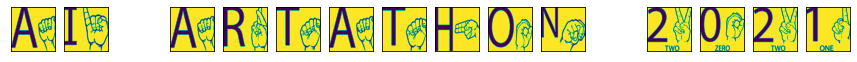

In [8]:
print_ASL('AI Artathon 2021!')

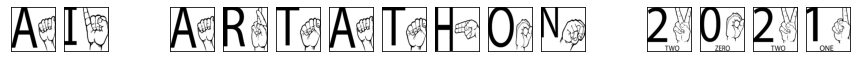

In [9]:
print_ASL('AI Artathon 2021!', color=False)

# Getting list of filenames in a specified directory

### monochrome - B/W

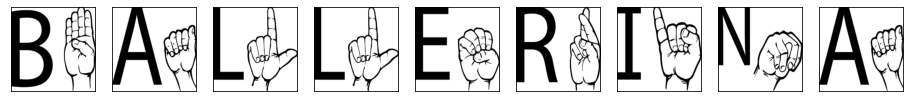

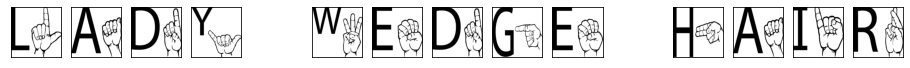

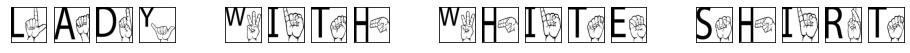

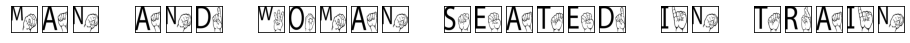

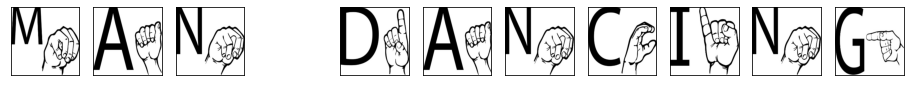

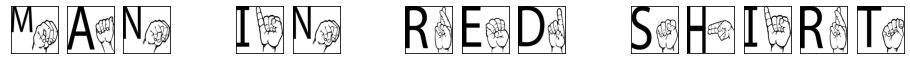

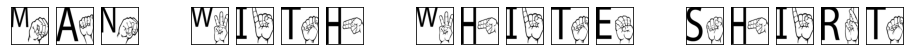

In [10]:
import os


PATH_RAW_IMAGES = r'data/art_raw_images/'

files = os.listdir(PATH_RAW_IMAGES)   # returns a list of files in the sub-directory

for file in files:
    # print(file)   # filenname with extension
    # remove trailing extension
    filename_no_ext = file.rsplit('.', 1)[0]
    # print(f'{filename_no_ext = }')
    # print(f'{type(filename_no_ext) = }')
    print_ASL(filename_no_ext, color=False)   # <---------

### color

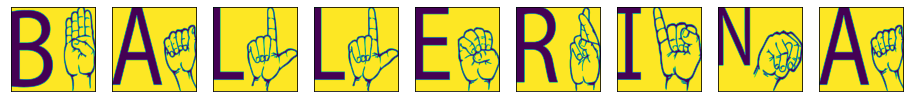

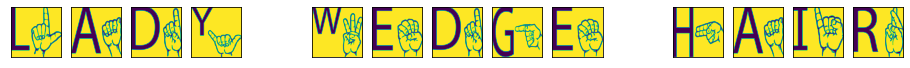

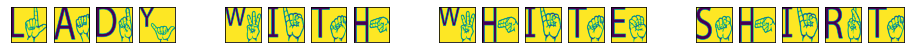

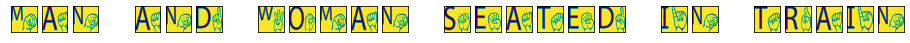

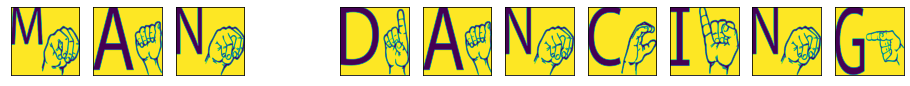

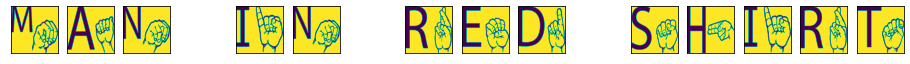

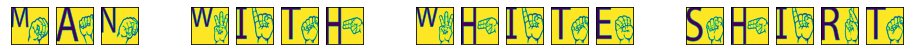

In [11]:
import os


PATH_RAW_IMAGES = r'data/art_raw_images/'

files = os.listdir(PATH_RAW_IMAGES)   # returns a list of files in the sub-directory

for file in files:
    # print(file)   # filenname with extension
    # remove trailing extension
    filename_no_ext = file.rsplit('.', 1)[0]
    # print(f'{filename_no_ext = }')
    # print(f'{type(filename_no_ext) = }')
    print_ASL(filename_no_ext, color=True)   # <---------

In [12]:
# !pip install -U textblob

In [13]:
# !python -m textblob.download_corpora

In [14]:
# from textblob import TextBlob

# blob = TextBlob("Buongiorno!")

# blob.detect_language()

# # print(blob.translate(to='en'))

In [15]:
# from textblob import TextBlob

# worter =  ['einer',  'zwei',  'drei',  'vier',  'fünf',  'sechs',  'sieben',  'acht',  'neun',  'zehn']

# for w in worter:
#     blob = TextBlob(w)
#     print(blob.translate(to='en'))

# TTX - Text To Speach

### TTS - UNIX<a id='tts-unix'></a>

<div style="text-align:right">
    <a href="#top">top</a>
</div>

In [214]:
# TTS - Text To Speech
import os

# macOS
os.system('say "Four-score and seven years ago"')
# or
!say "What a wonderful world!"
os.system(f'say {os.name}')  # posix
os.system(f'say {os.cpu_count()=}')   # nothing
_ = os.system(f'say "{os.cpu_count()=}"')   # os cpu count = 4, _ = to suppress printed 0

### TTS - WINDOWS<a id='tts-windows'></a>

<div style="text-align:right">
    <a href="#top">top</a>
</div>

+ SPEPY
    + `spepy` is an Python library for offline text to speech conversion.
    + `spepy` is for Windows only.
    + `spepy.speak(string)   # will speak the following string`
+ References:
    + spepy - pypi<BR>
    https://pypi.org/project/spepy/

In [16]:
#!pip install spepy

  Using cached spepy-1.0-py3-none-any.whl (2.8 kB)


In [17]:
import spepy

Thank you for downloading this library. I'd like to thanks Aman Raj, my Quora friend for the idea.
NOTE, This library is for windows only.


In [18]:
spepy.speak('Welcome my friends.')

In [20]:
import os   # to detect the Operating system with os.name() method
import spepy   # for Windows

os_name = os.name

def speak(text):
    '''
    Speak the input text.
    Works on Windows and unix machines (such as MacOS).
    '''
    if os_name == 'posix':   # unix, including MacOS
        os.system(f'say {text}')
    elif os_name == 'nt':   # Windows
        spepy.speak(text)
    return len(text)

In [21]:
speak("AI Artathon 2021")

16

# Identify the image

+ mock for now
+ pretend the object detection works

In [22]:
import os
import random


def object_recognition(image):
    '''
    Mock for now.
    Provided an image, return the iamge that matches.
    Currently image parameter is ignored and the image is identified derived
    from the filenames in PATH_RAW_IMAGES.
    Eventually, if an image is not matched then return None
    '''
    
    # returns a list of files in the sub-directory
    files = os.listdir(PATH_RAW_IMAGES)

    # print(files)

    # for file in files:
    #    print(file)   # filenname with extension

    file_list = random.sample(files, 1)
    file = file_list[0]
    # print(f'{file = }')
    # print(f'{type(file) = }')

    # remove trailing extension
    filename_no_ext = file.rsplit('.', 1)[0]
    # print(f'{filename_no_ext = }')
    # print(f'{type(filename_no_ext) = }')
    return filename_no_ext

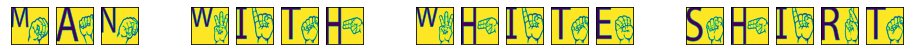

In [26]:
img = 5  #img is meaningless for now

obj_detected = object_recognition(img)

# print(f'{obj_detected = }')

print_ASL(obj_detected)

_ = speak(obj_detected)   # _ = to suppress output of the length of the obj_detected str

# Code snippets to detect user keyboard interruption

+ None of these work in Jupyter Notebook

In [ ]:
import cv2
import time

while True:
    time.sleep(0.5)
    print('.', sep='', end='')
    if cv2.waitKey(1) & 0xFF == ord('q'):   # Cannot get this to work (in Jupyter Notebook)
        break

In [ ]:
import cv2
import time

while True:
    k = cv2.waitKey(1) & 0xFF
    # press 'q' to exit
    if k == ord('q'):
        break
    elif k == ord('b'):
        # change a variable / do something ...
        print("you hit 'b'")
        break
    elif k == ord('k'):
        # change a variable / do something ...
        print("you hit '%killbgscripts'")
        break

In [ ]:
!pip install keyboard

In [ ]:
import keyboard
import time

while True:
    # do something
    time.sleep(0.5)
    print('.', sep='', end='')
    if keyboard.is_pressed("q"):
        print("q pressed, ending loop")
        break

In [ ]:
try:qq
    while True:
        # do_something()
        time.sleep(0.5)
        print('.', sep='', end='')
except KeyboardInterrupt:
    pass

print('Done!')

In [ ]:
import threading as th
import time
import keyboard

keep_going = True
def key_capture_thread():
    global keep_going
    a = keyboard.read_key()
    if a== "esc":
        keep_going = False


def do_stuff():
    th.Thread(target=key_capture_thread, args=(), name='key_capture_thread', daemon=True).start()
    i=0
    while keep_going:
        print('still going...')
        time.sleep(1)
        i=i+1
        print (i)
    print ("Schleife beendet")


do_stuff()

In [ ]:
!pip install pynput

In [ ]:
from pynput import keyboard
from threading import Thread
from time import sleep

def on_press(key, abortKey='esc'):    
    try:
        k = key.char  # single-char keys
    except:
        k = key.name  # other keys    

    print('pressed %s' % (k))
    if k == abortKey:
        print('end loop ...')
        return False  # stop listener

def loop_fun():
    while True:
        print('sleeping')
        sleep(5)
        
if __name__ == '__main__':
    abortKey = 't'
    listener = keyboard.Listener(on_press=on_press, abortKey=abortKey)
    listener.start()  # start to listen on a separate thread

    # start thread with loop
    Thread(target=loop_fun, args=(), name='loop_fun', daemon=True).start()

    listener.join() # wait for abortKey